In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
import visualization

## Task 3/5: Bifurcations in higher dimensions

### 1) Three Phase Diagrams

In [2]:
#Rewritten form of normal form of Andronov-Hopf Bifurcation
def hopf(x, y, alpha):
    u = alpha * x - y - x * (x**2 + y**2)
    v = x + alpha * y - y * (x**2 + y**2)
    return u, v

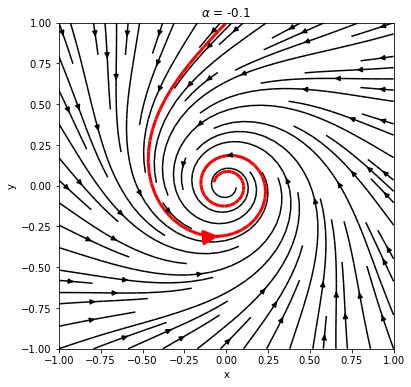

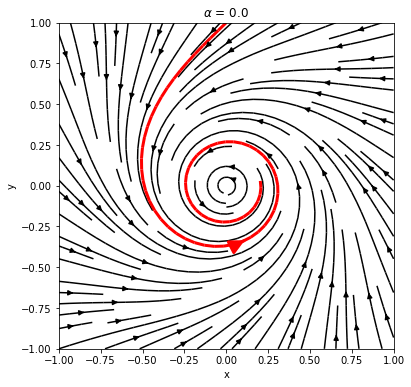

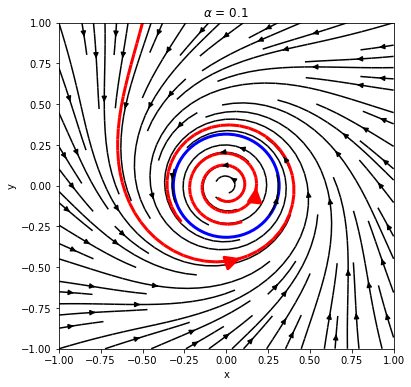

In [3]:
#We test for alpha < 0, alpha = 0, alpha > 0
alphas = [-0.1, 0.0, 0.1]

#Start points for the trajectories we plot
starts = [
    [[0.0,1.0]],
    [[-0.0,1.0]],
    [[0.0,0.2], [-0.5,1.0]]]

#loop over alpha values
for i in range(len(alphas)):
    #create plot
    plot = visualization.phase_diagram_with_trajectory_2d(hopf,alphas[i],starts[i],arrows=False)
    #if alpha > 0 add limit circle
    if alphas[i] > 0:
        plot.gca().add_artist(plt.Circle((0.0, 0.0), np.sqrt(alphas[i]), fill=False, color='blue', lw=3))
    #set title
    plot.gca().set_title("$α$ = {:.1f}".format(alphas[i]))
    #save plot as file
    plt.savefig("task3/hopf_phase_portrait_{i}.pdf".format(i=i))
    #show plot
    plt.show()

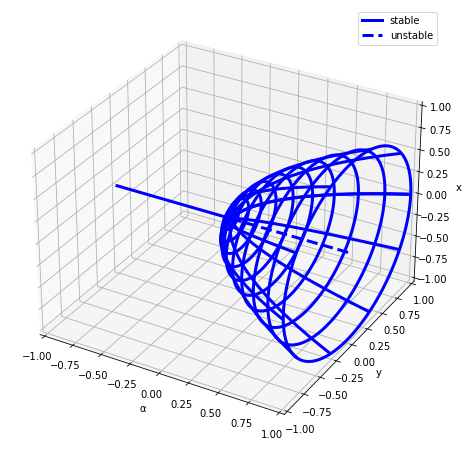

In [4]:
#NICE ADDITION: Actual Bifurcation diagram of Supercritical Andronov Hopf
#This generates a 3d bifurcation diagram (alpha, x, y) which is a paraboloid in the Hopf case

#generate the grid in cylindrical coordinates
r, theta = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 2 * np.pi, 100))

#get cartesian coordinates
x, y = r * np.cos(theta), r * np.sin(theta)
#alpha is paraboloid
alpha = (x)**2+(y)**2

#create 3d plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

#plot the paraboloid for alpha > 0
ax.plot_wireframe(alpha, x, y, color='blue', linewidth=3, antialiased=True, cstride=10, rstride=10)

#plot the stable equlibrium for alpha < 0
ax.plot(np.linspace(-1.0,0.0,2),np.linspace(0.0,0.0,2), np.linspace(0.0,0.0,2), color='blue', lw=3)

#plot the unstable equlibrium for alpha > 0
ax.plot(np.linspace(0.0,1.0,2),np.linspace(0.0,0.0,2), np.linspace(0.0,0.0,2), color='blue', lw=3, ls='dashed')

#set axes
ax.set_xlabel("α")
ax.set_ylabel("y")
ax.set_zlabel("x")
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.legend(('stable','unstable'),loc='best')

#save figure
plt.savefig("task3/hopf_bifurcation_diagram.pdf")

### 2) Numerical computation of two orbits within phase diagram for Hopf bifurcation and alpha=1

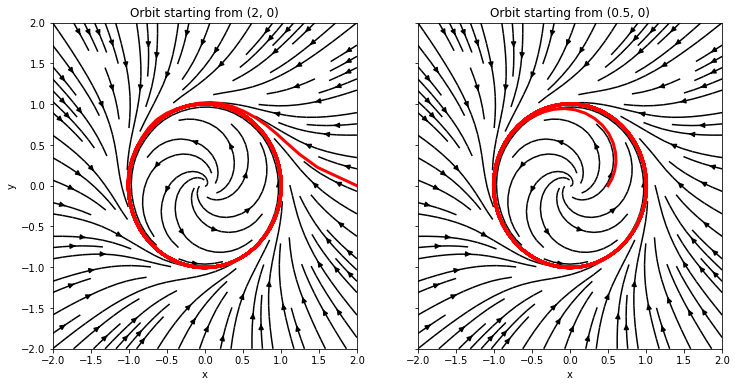

In [5]:
def andronov_hopf(t, space, alpha=1):
    x, y = space
    u = alpha * x - y - x * (x**2 + y**2)
    v = x + alpha * y - y * (x**2 + y**2)
    return u, v

#create figure
fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=True)

#fixed alpha
alpha = 1.0

x_lim = (-2, 2)
y_lim = (-2, 2)

#two different resolutions, one for the vector field using quiver / streamplot, and one for the trajectory using streamplot
resolution_traj = 200
resolution_vec = 15

x_traj, y_traj = np.meshgrid(np.linspace(x_lim[0], x_lim[1], resolution_traj), np.linspace(y_lim[0], y_lim[1], resolution_traj))
x_vec, y_vec = np.meshgrid(np.linspace(x_lim[0], x_lim[1], resolution_vec), np.linspace(y_lim[0], y_lim[1], resolution_vec))


#plot vector field with streamplot for both plots
axes[0].streamplot(x_vec, y_vec, hopf(x_vec, y_vec, alpha)[0], hopf(x_vec, y_vec, alpha)[1], color="black")
axes[1].streamplot(x_vec, y_vec, hopf(x_vec, y_vec, alpha)[0], hopf(x_vec, y_vec, alpha)[1], color="black")

#compute and plot trajectory for start point (2,0) using solve_ivp
t_0, t_end = 0, 150
t=np.linspace(t_0, t_end, 1000)
x0 = (2, 0)
traj = solve_ivp(andronov_hopf, t_span=(t_0, t_end), y0=x0, t_eval=t, method='RK45')
axes[0].plot(traj.y[0], traj.y[1], color='red', lw=3)
axes[0].set_title('Orbit starting from (2, 0)')

#compute and plot trajectory for start point (0.5,0) using solve_ivp
x0 = (0.5, 0)
traj = solve_ivp(andronov_hopf, t_span=(t_0, t_end), y0=x0, t_eval=t, method='RK45')
axes[1].plot(traj.y[0], traj.y[1], color='red', lw=3)
axes[1].set_title('Orbit starting from (0.5, 0)')

axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[1].set_xlabel('x')

#save figure
plt.savefig("task3/hopf_two_orbits_using_rk45.pdf")

### 3) One-dimensional bifurcation with two parameters

In [6]:
def cusp(x, alpha_1, alpha_2):
    return alpha_1 + alpha_2 * x - x**3

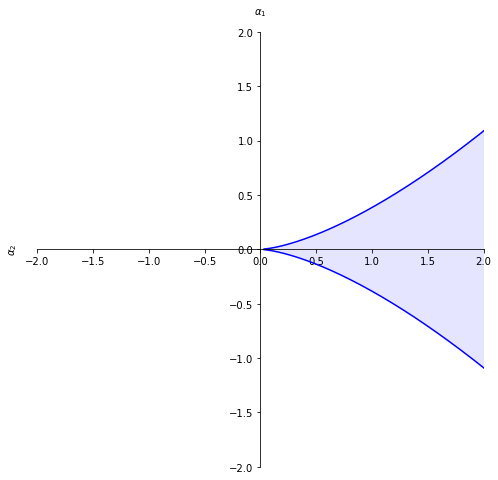

In [7]:
#plot 2d projection of cusp
alpha_2 = np.linspace(-2,2,1000)
alpha_1 = (27 / 4 * alpha_2**2) ** (1 / 3) 
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(alpha_1, alpha_2, color='blue')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_xlabel("$\\alpha_1$")
ax.xaxis.labelpad = -260
ax.set_ylabel("$\\alpha_2$")
ax.yaxis.labelpad = 210
ax.fill_between(alpha_1, -2,alpha_2, facecolor='blue', interpolate=True, alpha=0.1)
plt.savefig("task3/cusp_2d_projection.pdf")
plt.show()

In [8]:
#create data for cusp bifurcation by calculating the equilibrium for each combination of alpha_1 and alpha_2
#using fsolve()
alpha_1 = []
alpha_2 = []
x = []
for i in np.linspace(-2, 2, 20):
    for j in np.linspace(2, -2, 20):
        for k in np.linspace(-2, 2, 20):
            sol, info, convergence, sms = fsolve(cusp, x0=[k], args=(i, j), full_output=True)
            if convergence == 1:
                alpha_1.append(i)
                alpha_2.append(j)
                x.append(sol[0])

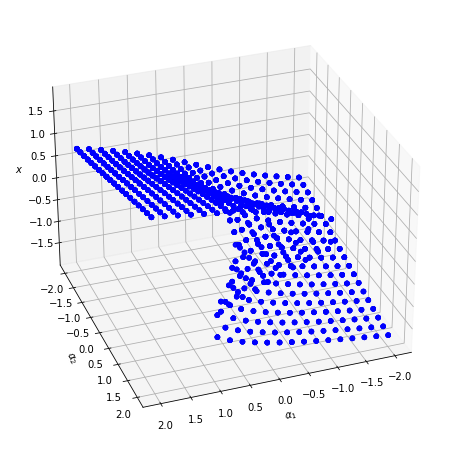

In [9]:
#create 3d plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

#set viewpoint to better see cusp
ax.view_init(elev=30, azim=70)

#set axes description
ax.set_xlabel("$α_1$")
ax.set_ylabel("$α_2$")
ax.set_zlabel("$x$")

#plot the bifurcation diagram depended on two paramters
ax.scatter3D(alpha_1, alpha_2, x, color='blue')

#save figure
plt.savefig("task3/cusp_bifurcation.pdf")
